<a href="https://colab.research.google.com/github/JPLAVALLEY/kaggle/blob/master/Housing_Prices_Model_Kaggle_TOP_15_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jplavalley","key":"6b3c042d9370b332481115da40efebc2"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Change permission
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 27.2MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 60.7MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 60.3MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 11.1MB/s]


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
import warnings
warnings.simplefilter(action='ignore')

In [0]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [106]:
print('The shape of our training set: ',df_train.shape[0], 'houses', 'and', df_train.shape[1], 'features')
print('The shape of our testing set: ',df_test.shape[0], 'houses', 'and', df_test.shape[1], 'features')
print('The testing set has 1 feature less than the training set, which is SalePrice, the target to predict  ')

The shape of our training set:  1460 houses and 81 features
The shape of our testing set:  1459 houses and 80 features
The testing set has 1 feature less than the training set, which is SalePrice, the target to predict  


In [107]:
#Missing Values

missing_count= (df_train.isnull().sum() / len(df_train)) * 100

#filter to find missing count greater than 0

missing_count = missing_count[missing_count > 0]

print(missing_count)

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


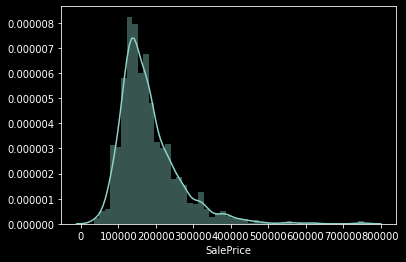

In [108]:
sns.distplot(df_train['SalePrice'])

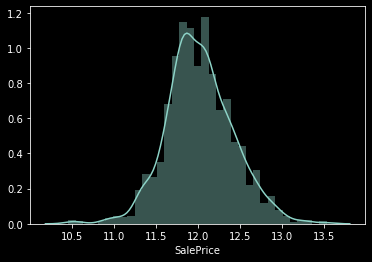

In [109]:
# data is skewed and not normalized, lets take the log scale of SalePrice

target = np.log(df_train['SalePrice'])

sns.distplot(target)

In [110]:
# this is more normally distributed than our original SalePrice
# Finding numerical features
numeric_data = df_train.select_dtypes(include = [np.number])

# Finding categorical features
categorical_data = df_train.select_dtypes(exclude = [np.number])

# Let's print how many numerical and categorical features do we have
print('There are {0} numerical and {1} categorical features in the training data'.\
format(numeric_data.shape[1], categorical_data.shape[1]))  

There are 38 numerical and 43 categorical features in the training data


In [0]:
# Lets make this a function so we can use it later as well
def Num_Cat_Count():
    # Finding numerical features
    numeric_data = df_train.select_dtypes(include = [np.number])

    # Finding categorical features
    categorical_data = df_train.select_dtypes(exclude = [np.number])

    # Let's print how many numerical and categorical features do we have
    print('There are {0} numerical and {1} categorical features in the training data'.\
        format(numeric_data.shape[1], categorical_data.shape[1]))    
    
#Num_Cat_Count()

In [112]:
Num_Cat_Count()

There are 38 numerical and 43 categorical features in the training data


In [113]:
# Correlation plot for the numerical features

numeric_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

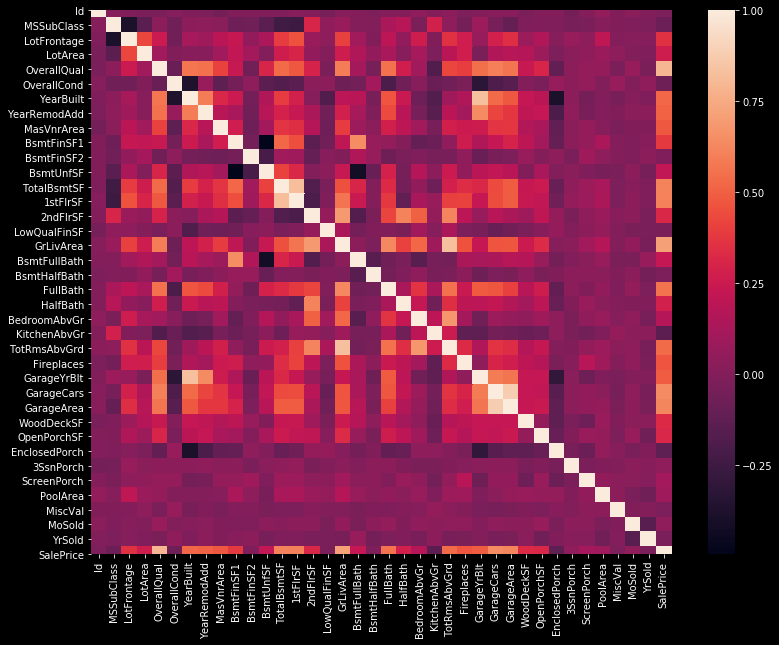

In [114]:
# Correlation plot of the feature in numeric_data

corr = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(13,10))
sns.heatmap(corr)

# Lighter color means greater correlation

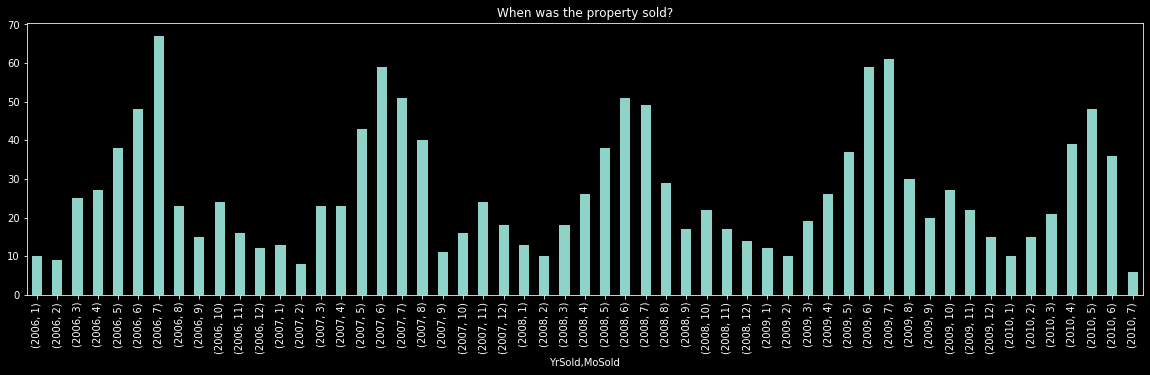

In [115]:
# When was the property sold in which year and month

df_train.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar', figsize=(20,5))
plt.title('When was the property sold?')
plt.show()

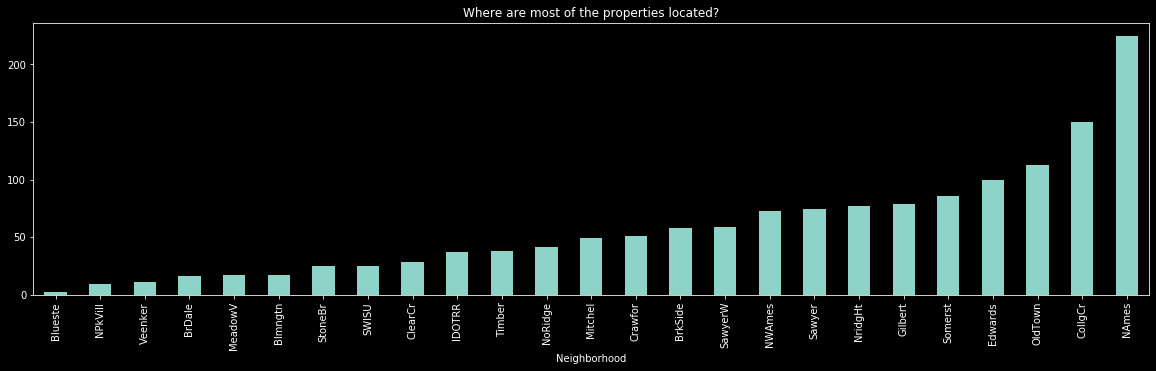

In [116]:
# Where are the properties located?

df_train.groupby('Neighborhood').Id.count(). \
    sort_values().\
    plot(kind='bar', figsize=(20,5))
plt.title('Where are most of the properties located?')
plt.show()

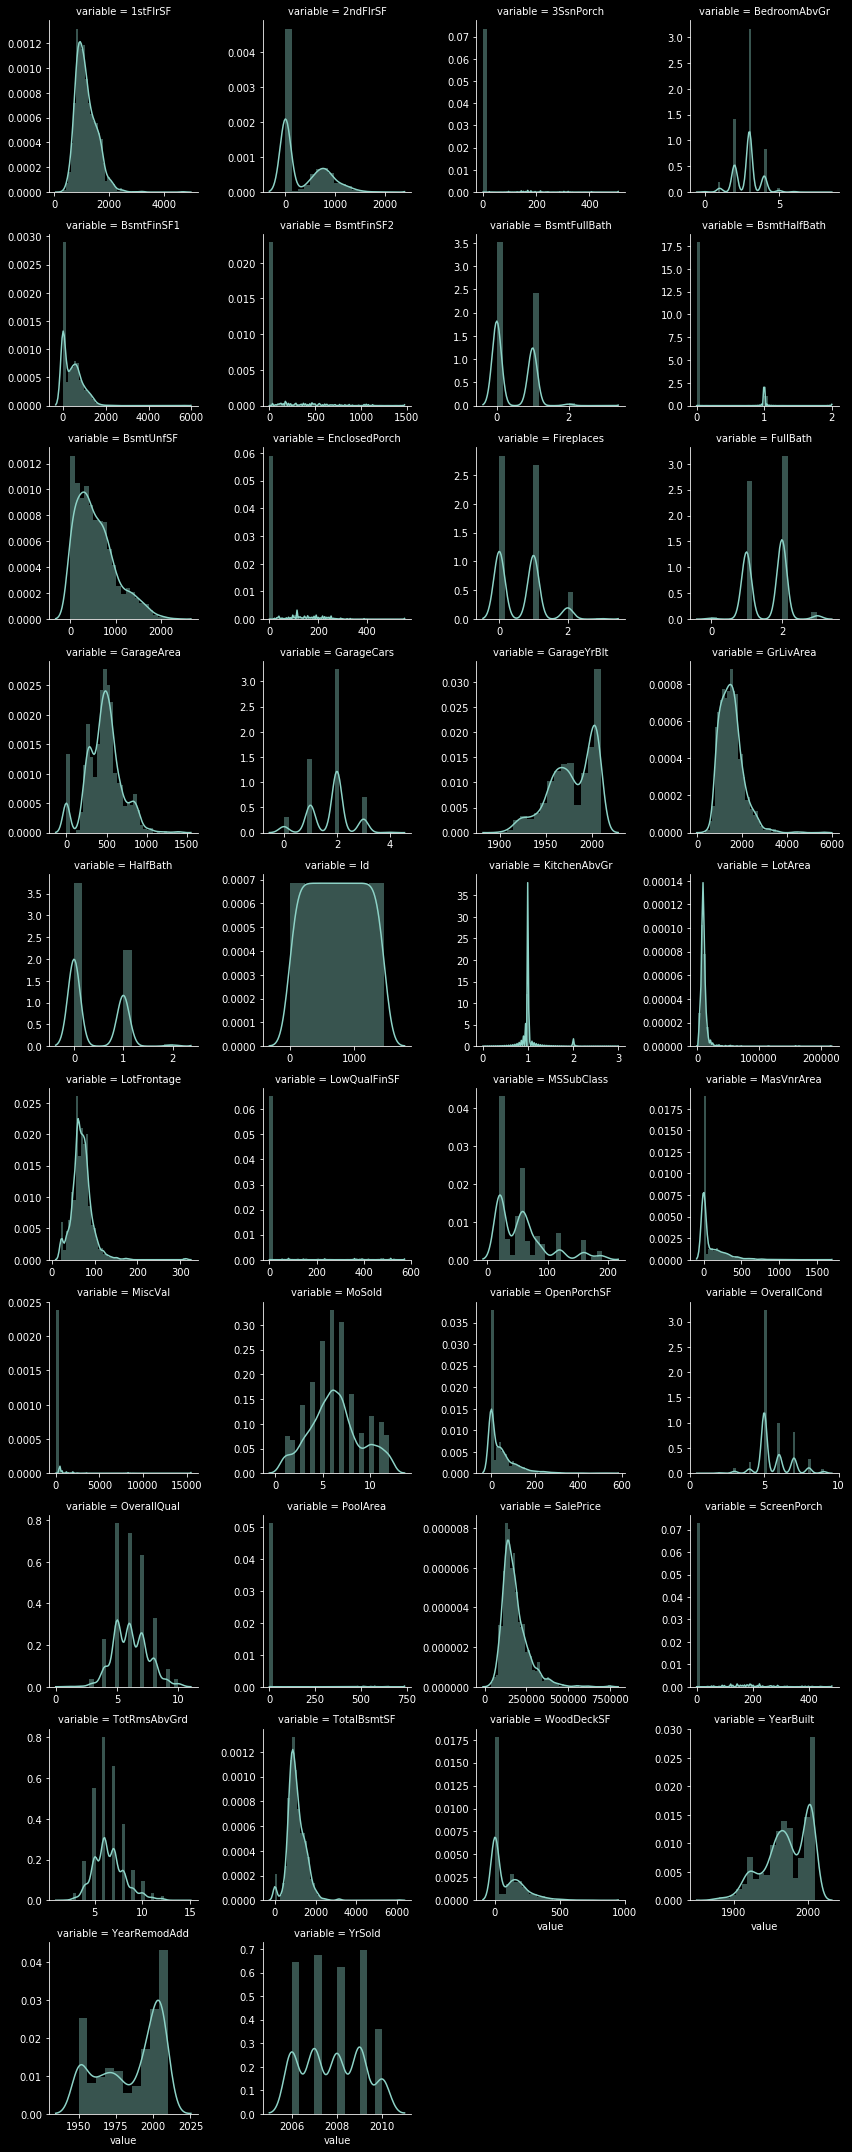

In [117]:
# Distribution of numerical features

f = pd.melt(df_train, value_vars=sorted(numeric_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

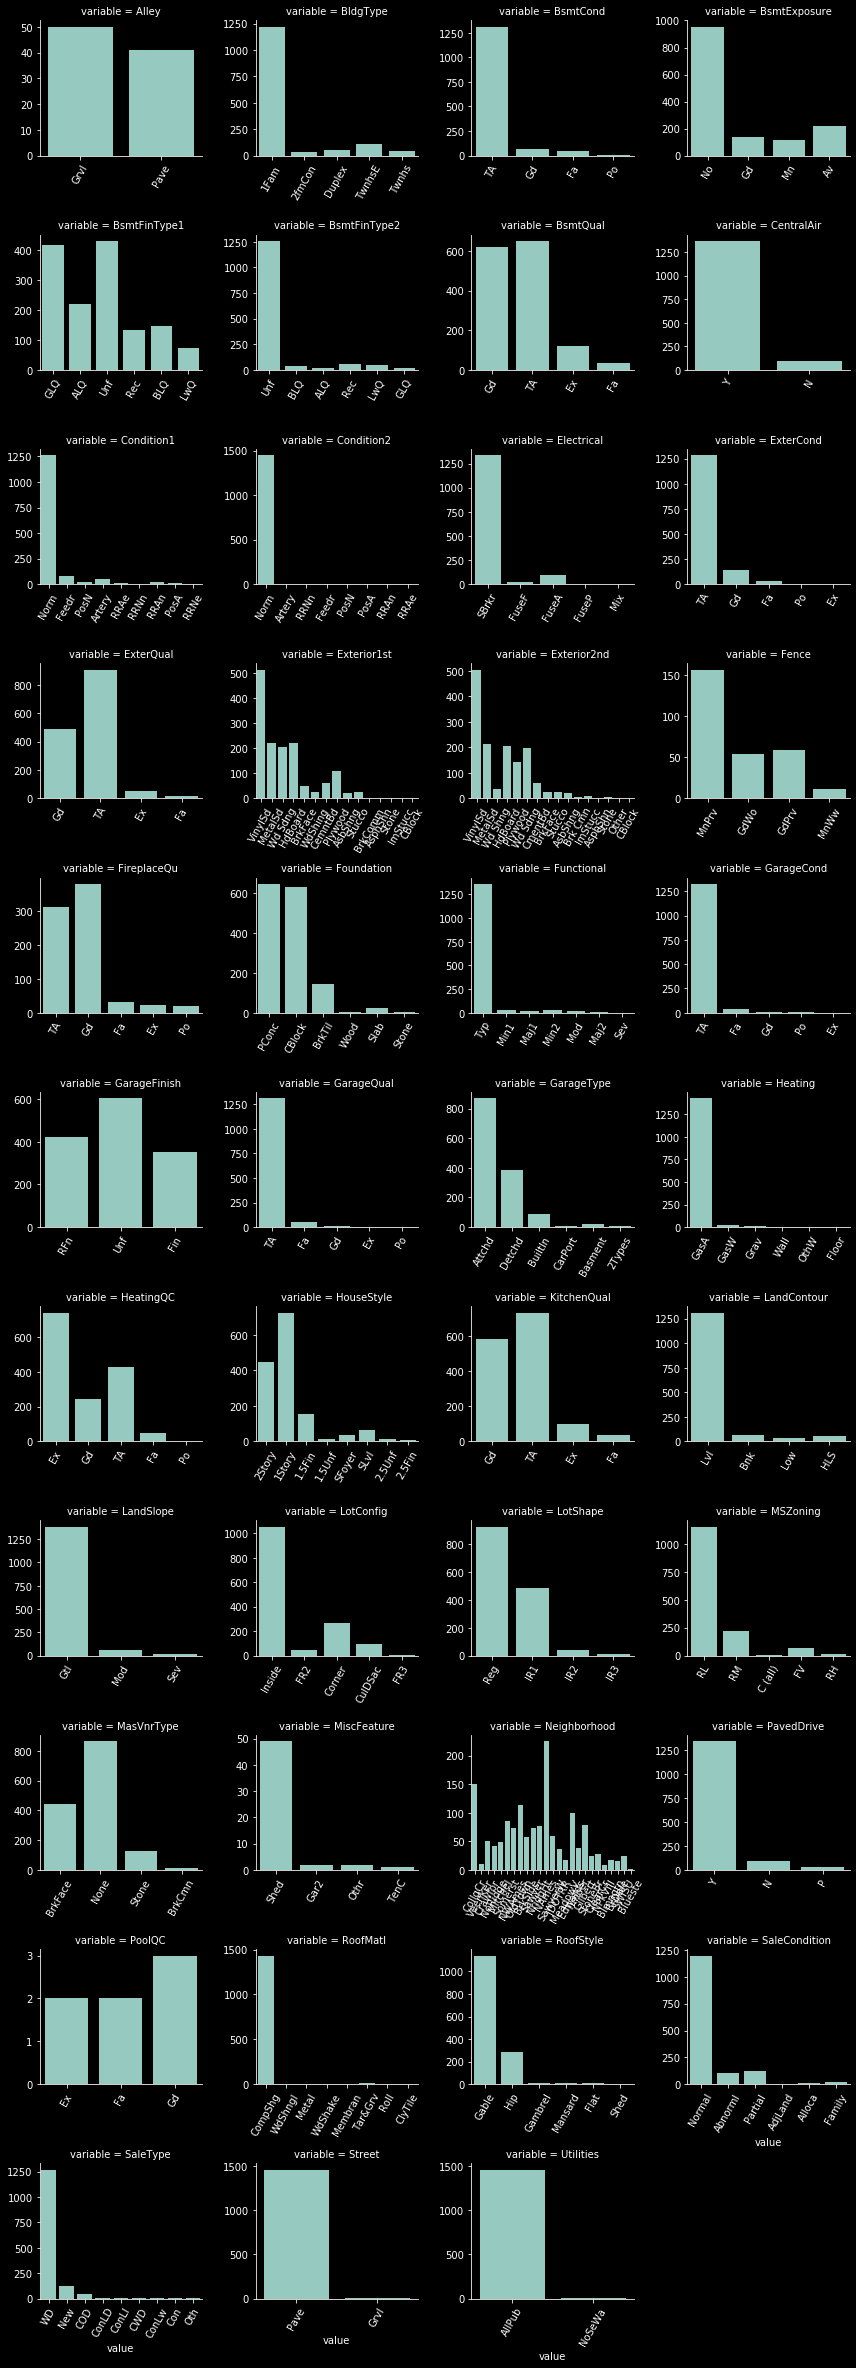

In [118]:
# Let's get a plot count of categorical features

f = pd.melt(df_train, value_vars=sorted(categorical_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

We combine the train and test datasets to run all the data munging and feature engineering on both of them.

In [119]:
na = df_train.shape[0]
nb = df_test.shape[0]
y_train = df_train['SalePrice'].to_frame()
#combine test and train sets
c1 = pd.concat((df_train,df_test), sort=False).reset_index(drop=True)
#Drop the target "SalePrice" and Id columns
c1.drop(['SalePrice'], axis=1, inplace=True)
c1.drop(['Id'], axis=1, inplace=True)
c1.shape

(2919, 79)

In [120]:
c=c1.dropna(thresh=len(c1)*0.9, axis=1)
print('We dropped ',c1.shape[1]-c.shape[1], ' features in the combined set')

We dropped  6  features in the combined set


In [121]:
 c.shape

(2919, 73)

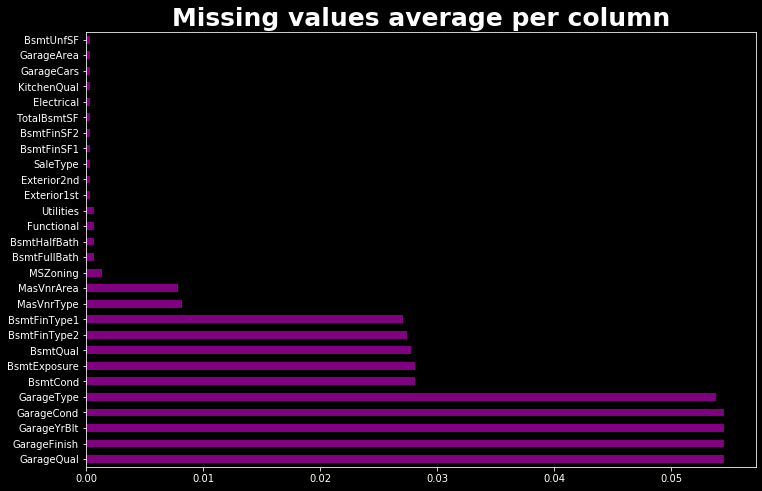

In [122]:
allna = (c.isnull().sum() / len(c))
allna = allna.drop(allna[allna == 0].index).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
allna.plot.barh(color='purple')
plt.title('Missing values average per column', fontsize=25, weight='bold' )
plt.show()

In [26]:
missing_data = c.isnull().sum() / c.shape[0]
missing_data[missing_data> 0].sort_values(ascending=True)

BsmtUnfSF       0.000343
GarageArea      0.000343
GarageCars      0.000343
KitchenQual     0.000343
Electrical      0.000343
TotalBsmtSF     0.000343
BsmtFinSF2      0.000343
BsmtFinSF1      0.000343
SaleType        0.000343
Exterior2nd     0.000343
Exterior1st     0.000343
Utilities       0.000685
Functional      0.000685
BsmtHalfBath    0.000685
BsmtFullBath    0.000685
MSZoning        0.001370
MasVnrArea      0.007879
MasVnrType      0.008222
BsmtFinType1    0.027064
BsmtFinType2    0.027407
BsmtQual        0.027749
BsmtExposure    0.028092
BsmtCond        0.028092
GarageType      0.053786
GarageCond      0.054471
GarageYrBlt     0.054471
GarageFinish    0.054471
GarageQual      0.054471
dtype: float64

In [123]:
print('The shape of the combined dataset after dropping features with more than 90% M.V.', c.shape)

The shape of the combined dataset after dropping features with more than 90% M.V. (2919, 73)


In [0]:
NA=c[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','GarageYrBlt','BsmtFinType2','BsmtFinType1','BsmtCond', \
      'BsmtQual','BsmtExposure', 'MasVnrArea','MasVnrType','Electrical','MSZoning','BsmtFullBath','BsmtHalfBath','Utilities',\
      'Functional','Exterior1st','BsmtUnfSF','Exterior2nd','TotalBsmtSF','GarageArea','GarageCars','KitchenQual','BsmtFinSF2','BsmtFinSF1','SaleType']]

In [125]:
NAcat=NA.select_dtypes(include='object')
NAnum=NA.select_dtypes(exclude='object')
print('We have :',NAcat.shape[1],'categorical features with missing values')
print('We have :',NAnum.shape[1],'numerical features with missing values')

We have : 18 categorical features with missing values
We have : 10 numerical features with missing values


In [126]:
NAnum.head()

,GarageYrBlt,MasVnrArea,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,TotalBsmtSF,GarageArea,GarageCars,BsmtFinSF2,BsmtFinSF1
0,2003.0,196.0,1.0,0.0,150.0,856.0,548.0,2.0,0.0,706.0
1,1976.0,0.0,0.0,1.0,284.0,1262.0,460.0,2.0,0.0,978.0
2,2001.0,162.0,1.0,0.0,434.0,920.0,608.0,2.0,0.0,486.0
3,1998.0,0.0,1.0,0.0,540.0,756.0,642.0,3.0,0.0,216.0
4,2000.0,350.0,1.0,0.0,490.0,1145.0,836.0,3.0,0.0,655.0


In [0]:
#MasVnrArea: Masonry veneer area in square feet, the missing data means no veneer so we fill with 0
c['MasVnrArea']=c.MasVnrArea.fillna(0)
#GarageYrBlt:  Year garage was built, we fill the gaps with the median: 1980
c['GarageYrBlt']=c["GarageYrBlt"].fillna(1980)
#For the rest of the columns: Bathroom, half bathroom, basement related columns and garage related columns:
#We will fill with 0s because they just mean that the hosue doesn't have a basement, bathrooms or a garage

In [130]:
NAcat.head()

,GarageType,GarageFinish,GarageQual,GarageCond,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,BsmtExposure,MasVnrType,Electrical,MSZoning,Utilities,Functional,Exterior1st,Exterior2nd,KitchenQual,SaleType
0,Attchd,RFn,TA,TA,Unf,GLQ,TA,Gd,No,BrkFace,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,Gd,WD
1,Attchd,RFn,TA,TA,Unf,ALQ,TA,Gd,Gd,None,SBrkr,RL,AllPub,Typ,MetalSd,MetalSd,TA,WD
2,Attchd,RFn,TA,TA,Unf,GLQ,TA,Gd,Mn,BrkFace,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,Gd,WD
3,Detchd,Unf,TA,TA,Unf,ALQ,Gd,TA,No,None,SBrkr,RL,AllPub,Typ,Wd Sdng,Wd Shng,Gd,WD
4,Attchd,RFn,TA,TA,Unf,GLQ,TA,Gd,Av,BrkFace,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,Gd,WD


In [131]:
NAcat1= NAcat.isnull().sum().to_frame().sort_values(by=[0]).T
cm = sns.light_palette("lime", as_cmap=True)

NAcat1 = NAcat1.style.background_gradient(cmap=cm)
NAcat1

,SaleType,Exterior2nd,Exterior1st,KitchenQual,Electrical,Functional,Utilities,MSZoning,MasVnrType,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtExposure,BsmtCond,GarageType,GarageCond,GarageQual,GarageFinish
0,1,1,1,1,1,2,2,4,24,79,80,81,82,82,157,159,159,159


In [0]:
#We start with features having just few missing value:  We fill the gap with forward fill method:
c['Electrical']=c['Electrical'].fillna(method='ffill')
c['SaleType']=c['SaleType'].fillna(method='ffill')
c['KitchenQual']=c['KitchenQual'].fillna(method='ffill')
c['Exterior1st']=c['Exterior1st'].fillna(method='ffill')
c['Exterior2nd']=c['Exterior2nd'].fillna(method='ffill')
c['Functional']=c['Functional'].fillna(method='ffill')
c['Utilities']=c['Utilities'].fillna(method='ffill')
c['MSZoning']=c['MSZoning'].fillna(method='ffill')

In [0]:
#Categorical missing values
NAcols=c.columns
for col in NAcols:
    if c[col].dtype == "object":
        c[col] = c[col].fillna("None")

In [0]:
#Numerical missing values
for col in NAcols:
    if c[col].dtype != "object":
        c[col]= c[col].fillna(0)

In [136]:
c.isnull().sum().sort_values(ascending=False).head()

SaleCondition    0
TotalBsmtSF      0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
dtype: int64

In [0]:
# Feature engineering, Since area is important, we will create a new feature called "TotalArea" that sums the area of all floors and the basement
c['TotalArea'] = c['TotalBsmtSF'] + c['1stFlrSF'] + c['2ndFlrSF'] + c['GrLivArea']

#Feature engineering helps imporve the model's performance, More may be added later

 Feature Encoding

In [139]:
cb=pd.get_dummies(c)
print("the shape of the original dataset",c.shape)
print("the shape of the encoded dataset",cb.shape)
print("We have ",cb.shape[1]- c.shape[1], 'new encoded features')

the shape of the original dataset (2919, 74)
the shape of the encoded dataset (2919, 279)
We have  205 new encoded features


In [0]:
#log transform skewed numeric features:
from scipy.stats import skew

numeric_feats = c.dtypes[c.dtypes != "object"].index

skewed_feats = c[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

c[skewed_feats] = np.log1p(c[skewed_feats])

In [0]:
#Splits the data back into the training and testing sets from the beginning
Train = cb[:na]  #na is the number of rows of the original training set
Test = cb[na:] 

In [144]:
Train.shape

(1460, 279)

In [145]:
Test.shape

(1459, 279)

Detecting Outliers

* using the original dataset

Text(0.5, 1.0, 'Masonry veneer Area - Price scatter plot')

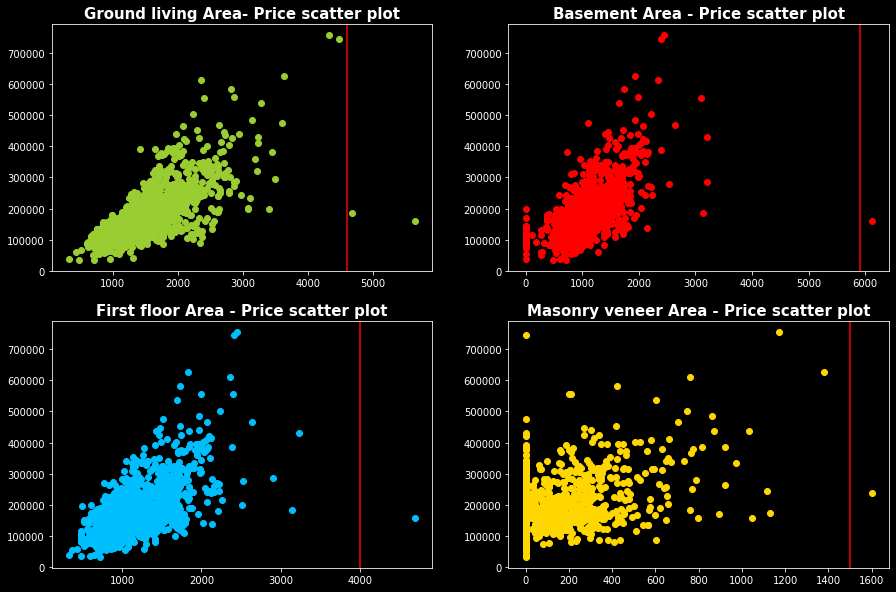

In [146]:
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,2),(0,0))
plt.scatter(x=df_train['GrLivArea'], y=df_train['SalePrice'], color=('yellowgreen'))
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Ground living Area- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((2,2),(0,1))
plt.scatter(x=df_train['TotalBsmtSF'], y=df_train['SalePrice'], color=('red'))
plt.axvline(x=5900, color='r', linestyle='-')
plt.title('Basement Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((2,2),(1,0))
plt.scatter(x=df_train['1stFlrSF'], y=df_train['SalePrice'], color=('deepskyblue'))
plt.axvline(x=4000, color='r', linestyle='-')
plt.title('First floor Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((2,2),(1,1))
plt.scatter(x=df_train['MasVnrArea'], y=df_train['SalePrice'], color=('gold'))
plt.axvline(x=1500, color='r', linestyle='-')
plt.title('Masonry veneer Area - Price scatter plot', fontsize=15, weight='bold' )

In [147]:
#Outlier identification GrLvArea
#only top 2 are outliers
#index 1298 and 523
df_train['GrLivArea'].sort_values(ascending=False).head(2)

1298    5642
523     4676
Name: GrLivArea, dtype: int64

In [148]:
#Outlier identification TotalBsmtSF
#only top 1 are outliers
#index 1298
df_train['TotalBsmtSF'].sort_values(ascending=False).head(1)

1298    6110
Name: TotalBsmtSF, dtype: int64

In [149]:
#Outlier identification MasVnrArea
#only top 1 are outliers
#index 297
df_train['MasVnrArea'].sort_values(ascending=False).head(1)

297    1600.0
Name: MasVnrArea, dtype: float64

In [150]:
#Outlier identification 1stFlrSF
#only top 1 are outliers
#index 1298
df_train['1stFlrSF'].sort_values(ascending=False).head(1)

1298    4692
Name: 1stFlrSF, dtype: int64

We want to remove 3 outliers, index 1298, 523, and 297

In [151]:
# we are doing this on our data that is already cleaned
train=Train[(Train['GrLivArea'] < 4600) & (Train['MasVnrArea'] < 1500)]

print('We removed ',Train.shape[0]- train.shape[0],'outliers')

We removed  3 outliers


We do the same thing with "SalePrice" column, we localize those rows 1298 and 523 and make sure they are the right outliers to remove.

They both have the same price range as the detected outliers. So, we just drop them.

In [152]:
target=df_train[['SalePrice']]
target.loc[1298]

SalePrice    160000
Name: 1298, dtype: int64

In [153]:
target.loc[523]

SalePrice    184750
Name: 523, dtype: int64

In [0]:
# we need to do the same thing in our target dataset 
pos = [1298, 523, 297]
target.drop(target.index[pos], inplace=True)

In [155]:
print('We make sure that both train and target sets have the same row number after removing the outliers:')
print( 'Train: ',train.shape[0], 'rows')
print('Target:', target.shape[0],'rows')

We make sure that both train and target sets have the same row number after removing the outliers:
Train:  1457 rows
Target: 1457 rows


Text(0.5, 1.0, 'Area-Price plot without outliers')

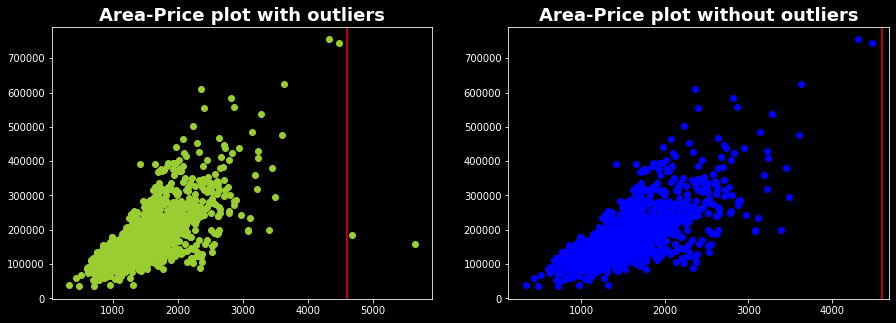

In [156]:
#plt.style.use('seaborn')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.scatter(x=df_train['GrLivArea'], y=df_train['SalePrice'], color=('yellowgreen'))
plt.title('Area-Price plot with outliers',weight='bold', fontsize=18)
plt.axvline(x=4600, color='r', linestyle='-')
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
plt.scatter(x=train['GrLivArea'], y=target['SalePrice'], color='blue')
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Area-Price plot without outliers',weight='bold', fontsize=18)

Log Transformation on the Target due to skew

In [0]:
#log transform the target:
target["SalePrice"] = np.log1p(target["SalePrice"])

Text(0.5, 1.0, 'Sale price distribution after normalization')

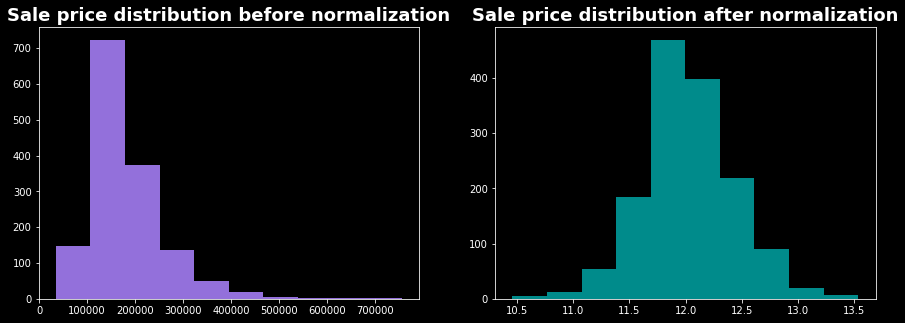

In [158]:
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.hist(df_train.SalePrice, bins=10, color='mediumpurple')
plt.title('Sale price distribution before normalization',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
plt.hist(target.SalePrice, bins=10, color='darkcyan')
plt.title('Sale price distribution after normalization',weight='bold', fontsize=18)

# Machine Learning

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm

In [0]:
#Preprocessing
# Features : x
# Target : y

x = train
y = np.array(target)

In [0]:
# split to train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .33, random_state=0)

In [0]:
# We use RobustScaler to scale our data because it's powerful against outliers, we already detected some but there must be some other outliers out there.
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
# transform "x_train"
x_train = scaler.fit_transform(x_train)
# transform "x_test"
x_test = scaler.transform(x_test)
#Transform the test set
X_test= scaler.transform(Test)

# Linear Regression
* 5 Fold cross validation

In [162]:
from sklearn.linear_model import LinearRegression

lreg=LinearRegression()
MSEs=ms.cross_val_score(lreg, x, y, scoring='neg_mean_squared_error', cv=5)
meanMSE=np.mean(MSEs)
print(meanMSE)
print('RMSE = '+str(math.sqrt(-meanMSE)))

-17480796.404625677
RMSE = 4181.004233988011


# Regularization

#Ridge Regression:
* Minimize square error + a term alpha that penalizes the error
* We need to find a value of alpha that minimizes the train and test error (avoid overfitting)

In [163]:
import sklearn.model_selection as GridSearchCV
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}

ridge_reg=ms.GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
ridge_reg.fit(x,y)
print("The best value of Alpha is: ",ridge_reg.best_params_)
print("The best score achieved with Alpha=14 is: ",ridge_reg.best_score_)

The best value of Alpha is:  {'alpha': 14}
The best score achieved with Alpha=14 is:  -0.013041933126555329


In [164]:
ridge_mod=Ridge(alpha=14)
ridge_mod.fit(x_train,y_train)
y_pred_train=ridge_mod.predict(x_train)
y_pred_test=ridge_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test)))) 

Root Mean Square Error train = 0.0946403632965905
Root Mean Square Error test = 0.11515590585841573


# Lasso Regression

In [166]:
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.001,0.01,0.1,1,10,100]}

lasso=Lasso()
lasso_reg=ms.GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
lasso_reg.fit(x,y)

print('The best value of Alpha is: ',lasso_reg.best_params_)
print('The best score achieved with Alpha=0.001 is: ',math.sqrt(-lasso_reg.best_score_))

The best value of Alpha is:  {'alpha': 0.001}
The best score achieved with Alpha=0.001 is:  0.11370955895588558


In [167]:
# Through trail and error I found that 0.009 gives a better result
lasso_mod=Lasso(alpha=0.0009)
lasso_mod.fit(x_train,y_train)
y_lasso_train=lasso_mod.predict(x_train)
y_lasso_test=lasso_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_lasso_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_lasso_test))))

Root Mean Square Error train = 0.10045178977303422
Root Mean Square Error test = 0.11207022047587373


# Which Features were important and which were dropped

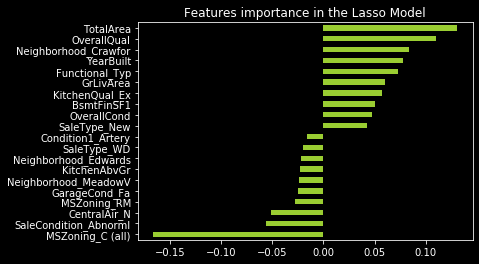

In [168]:
coefs = pd.Series(lasso_mod.coef_, index = x.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.title("Features importance in the Lasso Model")
plt.show()

In [169]:
print("Lasso kept ",sum(coefs != 0), "important features and dropped the other ", sum(coefs == 0)," features")

Lasso kept  89 important features and dropped the other  190  features


Next, we try ElasticNet. A regressor that combines both ridge and Lasso. We use cross validation to find:

* Alpha
* Ratio between Ridge and Lasso, for a better combination of both

# ElasticNet

In [170]:
from sklearn.linear_model import ElasticNetCV

alphas = [0.001, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 1,10]
l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

elasticmod = elastic_cv.fit(x_train, y_train.ravel())
ela_pred=elasticmod.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, ela_pred))))

Root Mean Square Error test = 0.11406867015625728


# XGBRegressor 

* first grid search tunes the hyperparameters, takes a long time to run.  The best estimator results to the model are below

In [0]:
from xgboost.sklearn import XGBRegressor
#from sklearn.model_selection import GridSearchCV


#xg_reg = XGBRegressor()
#xgparam_grid= {'learning_rate' : [0.01],'n_estimators':[3460],
#                                     'max_depth':[3], 'min_child_weight':[3,5],
#                                     'colsample_bytree':[0.5,0.7],
#                                     'reg_alpha':[0.0001,0.001,0.01,0.1,10,100],
#                                    'reg_lambda':[1,0.01,0.001,0.0001]}
#
#xg_grid=GridSearchCV(xg_reg, param_grid=xgparam_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
#xg_grid.fit(x_train,y_train)
#print(xg_grid.best_estimator_)
#print(xg_grid.best_score_)

In [172]:
xgb= XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=3, missing=None, n_estimators=3460,
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0.0001, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgmod=xgb.fit(x_train,y_train)
xg_pred=xgmod.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, xg_pred))))

Root Mean Square Error test = 0.11706447067107628


In [173]:
#Needs to be tuned
from sklearn.ensemble import ExtraTreesRegressor
ex_reg=ExtraTreesRegressor(n_estimators=2000, max_depth=20)

ex_mod=ex_reg.fit(x_train,y_train.ravel())
ex_pred=ex_mod.predict(x_test)

print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, ex_pred))))

Root Mean Square Error test = 0.13534172189620391


# VOTING REGRESSOR:
* A voting regressor is an ensemble meta-estimator that fits base regressors each on the whole dataset. It, then, averages the individual predictions to form a final prediction.

* After running the regressors, we combine them first with voting regressor in order to get a better model

In [174]:
from sklearn.ensemble import VotingRegressor

vote_mod = VotingRegressor([('Ridge', ridge_mod), ('Lasso', lasso_mod), ('Elastic', elastic_cv), ('XGBRegressor', xgb)])
vote= vote_mod.fit(x_train, y_train.ravel())
vote_pred=vote.predict(x_test)

print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, vote_pred))))

Root Mean Square Error test = 0.11017592167716057


# STACKING REGRESSOR:
We stack all the previous models, including the votingregressor as the meta regressor:

In [175]:
from mlxtend.regressor import StackingRegressor


stregr = StackingRegressor(regressors=[elastic_cv,ridge_mod, lasso_mod], 
                           meta_regressor=vote_mod, use_features_in_secondary=True)

stack_mod=stregr.fit(x_train, y_train.ravel())
stacking_pred=stack_mod.predict(x_test)

print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, stacking_pred))))

Root Mean Square Error test = 0.1118178308752365


Stacking Regressor not as good as VotingRegressor, we will average both of them for a better model

* Last thing to do is fit our regressor on the testing dataset and then average them

In [0]:
#VotingRegressor to predict the final Test
vote_test = vote_mod.predict(X_test)
final1=np.expm1(vote_test)

#StackingRegressor to predict the final Test
stack_test = stregr.predict(X_test)
final2=np.expm1(stack_test)

#LassoRegressor to predict the final Test
lasso_test = lasso_mod.predict(X_test)
final3=np.expm1(lasso_test)

I will create 2 csv files and test which one gives better results:

* 1: The VotingRegressor prediction (since it gave the best score)
* 2: The average prediction of the Voting/Stacking/Lasso (Averaging models tends to lower the error rates)
* We will submit both results and see which one gives the best LB score: Voting or Averaging.

In [0]:
#Submission of the results predicted by VotingRegressor
vote_submission = pd.DataFrame({
        "Id": df_test["Id"],
        "SalePrice": final1
    })
vote_submission.to_csv("sample_submission.csv", index=False)

Averaging the stacking, voting and lasso models

In [179]:
#Submission of the results predicted by the average of Voting/Stacking/Lasso
final=(final1+final2+final3)/3

final_submission = pd.DataFrame({
        "Id": df_test["Id"],
        "SalePrice": final
    })
final_submission.to_csv("sample_submission2.csv", index=False)
final_submission.head()

,Id,SalePrice
0,1461,116077.365346
1,1462,150919.926657
2,1463,178796.477833
3,1464,197097.455248
4,1465,186662.114661


In [180]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f sample_submission2.csv -m "Message"

100% 33.6k/33.6k [00:08<00:00, 4.13kB/s]
Successfully submitted to House Prices: Advanced Regression Techniques